In [1]:
import numpy as np # used for arrays

import gym # pull the environment

import time # to get the time

import math # needed for calculations
     

In [2]:
env = gym.make("CartPole-v1")
print(env.reset())

a, b, c, d, e = env.step(0)

f = np.zeros(shape=(3, 4, 4, 5))

f[0, 0, 0, 0] = 1
l = tuple(a.astype(np.int))
print(f[l])

(array([-0.03193058,  0.03712981,  0.03253431,  0.04293391], dtype=float32), {})
1.0


/var/folders/1r/3661zbjs66xbr4q6p7bj826c0000gn/T/ipykernel_48978/446547923.py:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  l = tuple(a.astype(np.int))


In [3]:
LEARNING_RATE = 0.1

DISCOUNT = 0.95
EPISODES = 60000
total = 0
total_reward = 0
prior_reward = 0

Observation = [30, 30, 50, 50]
np_array_win_size = np.array([0.25, 0.25, 0.01, 0.1])

epsilon = 1

epsilon_decay_value = 0.99995

In [36]:
print(np.random.randint(0, 2))

1


In [4]:
q_table = np.random.uniform(low=0, high=1, size=(Observation + [env.action_space.n]))
q_table.shape

(30, 30, 50, 50, 2)

In [5]:





def get_discrete_state(state):
    discrete_state = state/np_array_win_size+ np.array([15,10,1,10])
    return tuple(discrete_state.astype(np.int))

In [22]:
class Agent():
    def __init__(self, env, lr=0.1, discount=0.95, episodes=60000, bins=[30, 30, 50, 50], window=[0.25, 0.25, 0.01, 0.1],
        epsilon=1, epsilon_decay_value=0.99995):
        self.lr = lr
        self.discount = discount
        self.episodes = episodes
        self.bins = bins
        self.window = window
        self.epsilon = epsilon
        self.epsilon_decay_value = epsilon_decay_value
        self.q_table = np.random.uniform(low=0, high=1, size=(bins + [env.action_space.n]))
        print("Agent is ready to go")

    def discretize(self, state):
        discrete_state = state/self.window+ np.array([15,10,1,10])
        return tuple(discrete_state.astype(np.int))
    
    def act(self, discrete_state):
        if np.random.random() > self.epsilon:

            action = np.argmax(self.q_table[discrete_state]) #0, 1
        else:

            action = np.random.randint(0, 2)
        return action

    def epsilon_schedule(self, episode, current_reward, prior_reward):
        if self.epsilon > 0.05: 
            if current_reward > prior_reward and episode > 10000:
                self.epsilon = math.pow(self.epsilon_decay_value, episode - 10000)        

    def update_q(self, state, action, new_state, reward):
        max_future_q = np.max(self.q_table[new_state])

        current_q = self.q_table[state + (action,)]

        new_q = (1 - self.lr) * current_q + self.lr * (reward + self.discount * max_future_q)

        self.q_table[state + (action,)] = new_q
    
    def train(self, env):
        total = 0
        total_reward = 0
        rewards = []
        prior_reward = 0
        for episode in range(self.episodes + 1): 
            t0 = time.time() 
            discrete_state = self.discretize(env.reset()[0]) 
            done = False
            episode_reward = 0 

            if episode % 2000 == 0: 
                print("Episode: " + str(episode))

            while not done: 
                action = self.act(discrete_state)
                new_state, reward, done, _, _ = env.step(action) 

                episode_reward += reward 

                new_discrete_state = self.discretize(new_state)

                if episode % 2000 == 0: 
                    env.render()

                if not done: 
                    self.update_q(discrete_state, action, new_discrete_state, reward)

                discrete_state = new_discrete_state

            self.epsilon_schedule(episode, episode_reward, prior_reward)

            if episode % 500 == 0:
                print("Epsilon: " + str(self.epsilon))

            t1 = time.time() 
            episode_total = t1 - t0 
            total = total + episode_total
            rewards.append(episode_reward)
            total_reward += episode_reward 
            prior_reward = episode_reward

            if episode % 1000 == 0: 
                mean = total / 1000
                print("Time Average: " + str(mean))
                total = 0

                mean_reward = total_reward / 1000
                print("Mean Reward: " + str(mean_reward))
                total_reward = 0

        env.close()
        return rewards

    def inference(self, env, epochs=100):
        rewards = []
        for episode in range(epochs): 
            t0 = time.time() 
            discrete_state = self.discretize(env.reset()[0]) 
            done = False
            episode_reward = 0 
            print("Episode: " + str(episode))
            e = 0
            while not done and e != 500: 
                action = np.argmax(self.q_table[discrete_state]) 

                new_state, reward, done, _, _ = env.step(action) 

                episode_reward += reward 

                new_discrete_state = self.discretize(new_state)

                discrete_state = new_discrete_state
                e += 1

            rewards.append(episode_reward)
            print(f"episode {e} reward {episode_reward}")
        env.close()
        return rewards  



In [23]:

env = gym.make('CartPole-v1')
agent = Agent(env)
agent.train(env)
rewards = agent.inference()


Agent is ready to go
Episode: 0
Epsilon: 1
Time Average: 5.070924758911132e-06
Mean Reward: 0.015


/var/folders/1r/3661zbjs66xbr4q6p7bj826c0000gn/T/ipykernel_93275/2686444880.py:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return tuple(discrete_state.astype(np.int))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/gym/envs/classic_control/cartpole.py:211: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("CartPole-v1", render_mode="rgb_array")
  gym.logger.warn(


Epsilon: 1
Epsilon: 1
Time Average: 0.0023016808032989503
Mean Reward: 22.014
Epsilon: 1
Episode: 2000
Epsilon: 1
Time Average: 0.001931032419204712
Mean Reward: 22.319
Epsilon: 1
Epsilon: 1
Time Average: 0.0015232183933258057
Mean Reward: 22.558
Epsilon: 1
Episode: 4000
Epsilon: 1
Time Average: 0.0015381722450256347
Mean Reward: 22.465
Epsilon: 1
Epsilon: 1
Time Average: 0.0015045342445373536
Mean Reward: 21.363
Epsilon: 1
Episode: 6000
Epsilon: 1
Time Average: 0.0015907282829284667
Mean Reward: 22.431
Epsilon: 1
Epsilon: 1
Time Average: 0.0015519320964813232
Mean Reward: 22.044
Epsilon: 1
Episode: 8000
Epsilon: 1
Time Average: 0.0015135700702667235
Mean Reward: 22.467
Epsilon: 1
Epsilon: 1
Time Average: 0.0015108482837677003
Mean Reward: 22.037
Epsilon: 1
Episode: 10000
Epsilon: 1
Time Average: 0.0015342490673065185
Mean Reward: 22.737
Epsilon: 0.9753093024395111
Epsilon: 0.9512282354250458
Time Average: 0.0015734367370605468
Mean Reward: 23.119
Epsilon: 0.9277417467531685
Episode: 1

TypeError: inference() missing 1 required positional argument: 'env'

In [24]:
rewards = agent.inference(env)

/var/folders/1r/3661zbjs66xbr4q6p7bj826c0000gn/T/ipykernel_93275/2686444880.py:16: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return tuple(discrete_state.astype(np.int))


Episode: 0
episode 500 reward 500.0
Episode: 1
episode 211 reward 211.0
Episode: 2
episode 186 reward 186.0
Episode: 3
episode 186 reward 186.0
Episode: 4
episode 175 reward 175.0
Episode: 5
episode 180 reward 180.0
Episode: 6
episode 499 reward 499.0
Episode: 7
episode 244 reward 244.0
Episode: 8
episode 269 reward 269.0
Episode: 9
episode 208 reward 208.0
Episode: 10
episode 156 reward 156.0
Episode: 11
episode 160 reward 160.0
Episode: 12
episode 233 reward 233.0
Episode: 13
episode 138 reward 138.0
Episode: 14
episode 205 reward 205.0
Episode: 15
episode 312 reward 312.0
Episode: 16
episode 500 reward 500.0
Episode: 17
episode 500 reward 500.0
Episode: 18
episode 149 reward 149.0
Episode: 19
episode 275 reward 275.0
Episode: 20
episode 500 reward 500.0
Episode: 21
episode 454 reward 454.0
Episode: 22
episode 500 reward 500.0
Episode: 23
episode 500 reward 500.0
Episode: 24
episode 465 reward 465.0
Episode: 25
episode 278 reward 278.0
Episode: 26
episode 500 reward 500.0
Episode: 27

In [26]:
print(sum(rewards)/len(rewards))

279.49


In [6]:
rewards = []
for episode in range(EPISODES + 1): 
    t0 = time.time() 
    discrete_state = get_discrete_state(env.reset()[0]) 
    done = False
    episode_reward = 0 

    if episode % 2000 == 0: 
        print("Episode: " + str(episode))

    while not done: 

        if np.random.random() > epsilon:

            action = np.argmax(q_table[discrete_state]) 
        else:

            action = np.random.randint(0, env.action_space.n) 

        new_state, reward, done, _, _ = env.step(action) 

        episode_reward += reward 

        new_discrete_state = get_discrete_state(new_state)

        if episode % 2000 == 0: 
            env.render()

        if not done: 
            max_future_q = np.max(q_table[new_discrete_state])

            current_q = q_table[discrete_state + (action,)]

            new_q = (1 - LEARNING_RATE) * current_q + LEARNING_RATE * (reward + DISCOUNT * max_future_q)

            q_table[discrete_state + (action,)] = new_q

        discrete_state = new_discrete_state

    if epsilon > 0.05: 
        if episode_reward > prior_reward and episode > 10000:
            epsilon = math.pow(epsilon_decay_value, episode - 10000)

            if episode % 500 == 0:
                print("Epsilon: " + str(epsilon))

    t1 = time.time() 
    episode_total = t1 - t0 
    total = total + episode_total
    rewards.append(episode_reward)
    total_reward += episode_reward 
    prior_reward = episode_reward

    if episode % 1000 == 0: 
        mean = total / 1000
        print("Time Average: " + str(mean))
        total = 0

        mean_reward = total_reward / 1000
        print("Mean Reward: " + str(mean_reward))
        total_reward = 0

env.close()

/var/folders/1r/3661zbjs66xbr4q6p7bj826c0000gn/T/ipykernel_48978/768202945.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return tuple(discrete_state.astype(np.int))
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/gym/envs/classic_control/cartpole.py:211: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("CartPole-v1", render_mode="rgb_array")
  gym.logger.warn(


Episode: 0
Time Average: 1.2732982635498047e-05
Mean Reward: 0.011
Time Average: 0.004662780523300171
Mean Reward: 22.672
Episode: 2000
Time Average: 0.0033853695392608643
Mean Reward: 21.309
Time Average: 0.002042210578918457
Mean Reward: 22.206
Episode: 4000
Time Average: 0.0015948331356048584
Mean Reward: 22.946
Time Average: 0.0015249207019805908
Mean Reward: 22.496
Episode: 6000
Time Average: 0.0015357308387756348
Mean Reward: 22.147
Time Average: 0.0015332076549530028
Mean Reward: 22.774
Episode: 8000
Time Average: 0.0014696123600006104
Mean Reward: 22.165
Time Average: 0.001450815200805664
Mean Reward: 21.902
Episode: 10000
Time Average: 0.001479133129119873
Mean Reward: 22.301
Time Average: 0.0015695199966430664
Mean Reward: 23.046
Episode: 12000
Epsilon: 0.9048351558698463
Time Average: 0.001993694543838501
Mean Reward: 24.424
Time Average: 0.002750298500061035
Mean Reward: 25.518
Episode: 14000
Time Average: 0.003976641654968261
Mean Reward: 26.343
Time Average: 0.00196053862

In [18]:
print(sum(rewards)/len(rewards))

TypeError: 'NoneType' object is not iterable

In [14]:
rewards = []
for episode in range(100): 
    t0 = time.time() 
    discrete_state = get_discrete_state(env.reset()[0]) 
    done = False
    episode_reward = 0 
    print("Episode: " + str(episode))
    e = 0
    while not done and e != 500: 
        action = np.argmax(q_table[discrete_state]) 

        new_state, reward, done, _, _ = env.step(action) 
        print(done)

        episode_reward += reward 

        new_discrete_state = get_discrete_state(new_state)

        discrete_state = new_discrete_state
        e += 1

    t1 = time.time() 
    episode_total = t1 - t0 
    total = total + episode_total
    rewards.append(episode_reward)
    total_reward += episode_reward 
    prior_reward = episode_reward
    print(f"episode {e} reward {episode_reward}")
env.close()

/var/folders/1r/3661zbjs66xbr4q6p7bj826c0000gn/T/ipykernel_48978/768202945.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return tuple(discrete_state.astype(np.int))


Episode: 0
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False

In [15]:
print(sum(rewards)/len(rewards))

239.75


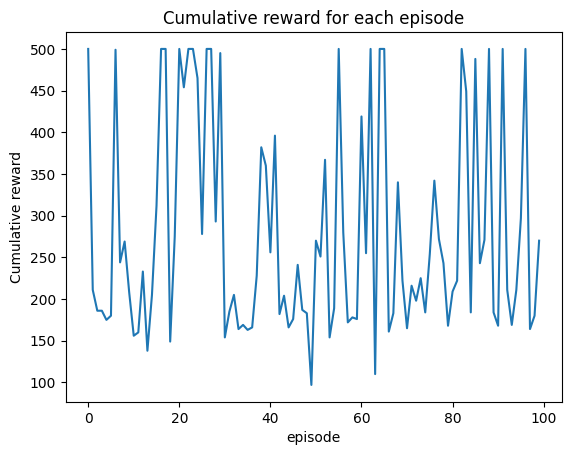

In [27]:
import matplotlib.pyplot as plt
plt.plot(np.array(rewards))
plt.title('Cumulative reward for each episode')
plt.ylabel('Cumulative reward')
plt.xlabel('episode')
plt.show()

In [13]:
from gym import logger as gymlogger
from gym.wrappers import RecordVideo
from IPython.display import HTML
from IPython import display as ipythondisplay
import glob
import io
import base64
def show_video():
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    ipythondisplay.display(HTML(data=''''''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")


env = RecordVideo(gym.make("CartPole-v1"), "./video")
observation = env.reset()
while True:
    env.render()
    action = np.argmax(q_table[get_discrete_state(env.reset()[0])])
    observation, reward, done, info, _ = env.step(action) 
    if done: 
      break;    
env.close()
show_video()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/gym/wrappers/record_video.py:75: UserWarning: WARN: Overwriting existing videos at /Users/aryansharma/PoleDancer/video folder (try specifying a different `video_folder` for the `RecordVideo` wrapper if this is not desired)
  logger.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/gym/wrappers/monitoring/video_recorder.py:59: UserWarning: WARN: Disabling video recorder because environment <TimeLimit<OrderEnforcing<PassiveEnvChecker<CartPoleEnv<CartPole-v1>>>>> was not initialized with any compatible video mode between `rgb_array` and `rgb_array_list`
  logger.warn(
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/gym/envs/classic_control/cartpole.py:211: UserWarning: WARN: You are calling render method without specifying any render mode. You can specify the render_mode at initialization, e.g. gym("CartPole-v1", render_mode="rgb_array")
  gym.logge

KeyboardInterrupt: 